<a href="https://colab.research.google.com/github/cagedlion/cagedlion/blob/main/Small_Cardamom_30_days_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#This file attempts to predict the future 30 day price of Small Cardamom produced and auctioned in Kerala

In [24]:
# The first thing we want to do is import the necessary library and import the data file
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
## Load the data
from google.colab import files
files.upload()


Saving Indian Small Cardamom Price History.csv to Indian Small Cardamom Price History.csv


{'Indian Small Cardamom Price History.csv': b'\xef\xbb\xbfSno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)\r\n1-Jan-00,22-Apr-21,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED,210,70654.2,70113.5,1725,1132.99\r\n2,21-Apr-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177,1053.7\r\n3,21-Apr-21,Green House Cardamom Mktg.India Pvt. Ltd,216,39139.3,35259.8,1770,1041.09\r\n4,19-Apr-21,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825,1192.97\r\n5,19-Apr-21,IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd,208,60107.8,52678.5,1832,1185.24\r\n6,17-Apr-21,"The Kerala Cardamom Processing and Marketing Company Limited, Thekkady",234,74573.8,73856,1872,1251.65\r\n7,16-Apr-21,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875,1292.21\r\n8,16-Apr-21,"Header Systems (India) Limited, Nedumkandam",253,73606.3,69536.1,1806,1224.24\r\n9,13-Apr-21,"Cardamom Planters\'

In [26]:
# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
df = pd.read_csv('Indian Small Cardamom Price History.csv')  
# Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
df.head()  # look at the dataframe

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1-Jan-00,22-Apr-21,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2,21-Apr-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
2,3,21-Apr-21,Green House Cardamom Mktg.India Pvt. Ltd,216,39139.3,35259.8,1770.0,1041.09
3,4,19-Apr-21,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
4,5,19-Apr-21,IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMP...,208,60107.8,52678.5,1832.0,1185.24


In [27]:
df.shape

(2836, 8)

In [28]:
df.describe(include="all")

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
count,2836,2836,2836,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000
unique,2836,1659,15,NaN,NaN,NaN,NaN,NaN
top,454,20-Jun-15,"South Indian Green Cardamom Company Ltd, Kochi",NaN,NaN,NaN,NaN,NaN
freq,1,4,254,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,242.998237,49481.902080,47895.808533,1712.738540,1371.933449
std,NaN,NaN,NaN,110.173532,28965.931473,29777.961912,929.038819,845.339288
min,NaN,NaN,NaN,25.000000,4048.600000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,164.000000,27303.225000,25916.975000,1100.000000,816.082500
50%,NaN,NaN,NaN,233.000000,45213.050000,43410.000000,1352.500000,1062.070000
75%,NaN,NaN,NaN,304.000000,66004.925000,64224.475000,1970.000000,1517.610000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sno                      2836 non-null   object 
 1   Date of Auction          2836 non-null   object 
 2   Auctioneer               2836 non-null   object 
 3   No.of Lots               2836 non-null   int64  
 4   Total Qty Arrived (Kgs)  2836 non-null   float64
 5   Qty Sold (Kgs)           2836 non-null   float64
 6   MaxPrice (Rs./Kg)        2836 non-null   float64
 7   Avg.Price (Rs./Kg)       2836 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 177.4+ KB


In [30]:
### Checking for null values
df.isnull().sum()

Sno                        0
Date of Auction            0
Auctioneer                 0
No.of Lots                 0
Total Qty Arrived (Kgs)    0
Qty Sold (Kgs)             0
MaxPrice (Rs./Kg)          0
Avg.Price (Rs./Kg)         0
dtype: int64

In [31]:
### Checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [32]:
df['Auctioneer'].value_counts()

South Indian Green Cardamom Company Ltd, Kochi                            254
Mas Enterprises, Vandanmettu                                              249
Header Systems (India) Limited, Nedumkandam                               248
The Kerala Cardamom Processing and Marketing Company Limited, Thekkady    245
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd                             236
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd                     236
Green House Cardamom Mktg.India Pvt. Ltd                                  233
CARDAMOM GROWERSFOREVER PRIVATE LIMITED                                   224
VANDANMEDU GREEN GOLD CARDAMOM PRODUCER CoLtd                             214
Cardamom Planters' Association, Santhanpara                               194
THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED              177
STATE TRADING CORPORATION                                                 130
Spice More Trading Company, Kumily                              

In [33]:
### We need to drop multiple price rows for same days, due to different pricings at multiple auctioneers
df=df.drop_duplicates(subset="Date of Auction")
df.shape

(1659, 8)

In [34]:
### Now we have a clean dataset with unique price values for each date commencing November 2014 till 22 Apr 2021

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


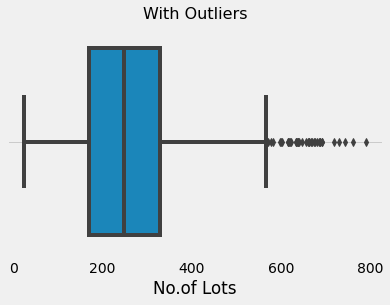

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


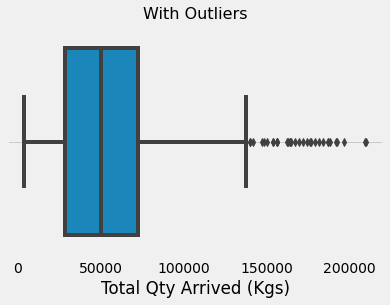

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


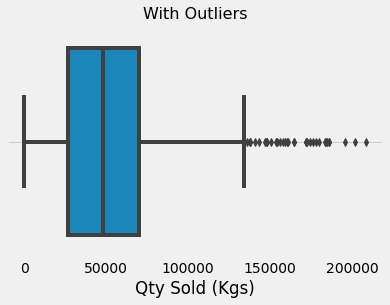

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


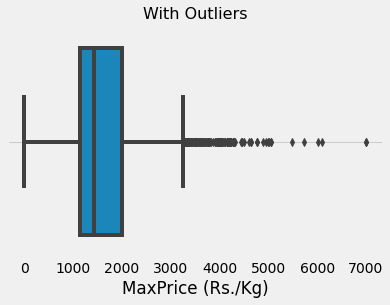

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


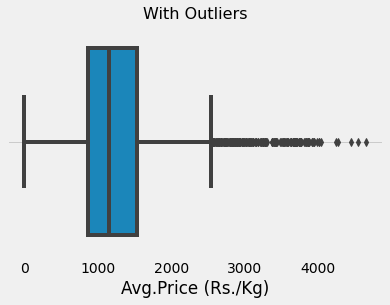

In [35]:
### Checking for outliers
import seaborn as sns
cols = ['No.of Lots','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('With Outliers',fontsize=16)
    plt.show();

In [36]:
### Treating Outliers as the same may create havoc in regression models
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
df.dtypes

Sno                         object
Date of Auction             object
Auctioneer                  object
No.of Lots                   int64
Total Qty Arrived (Kgs)    float64
Qty Sold (Kgs)             float64
MaxPrice (Rs./Kg)          float64
Avg.Price (Rs./Kg)         float64
dtype: object

In [38]:
for column in df.columns:
    if df[column].dtype == 'float': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])
        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


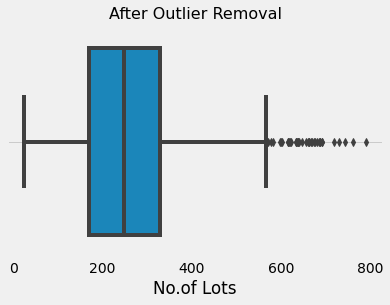

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


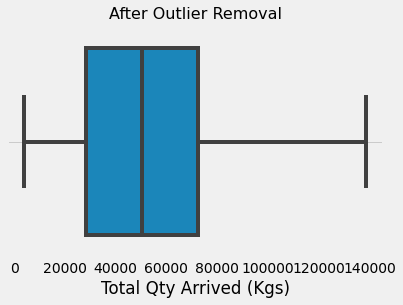

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


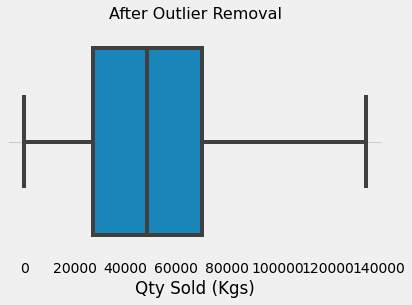

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


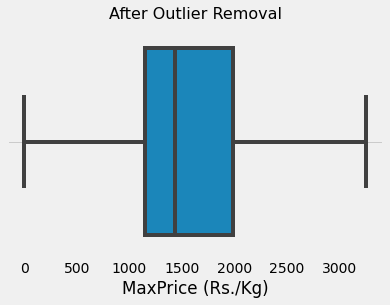

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


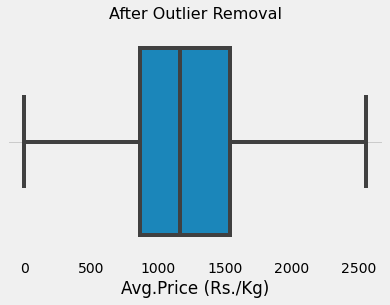

In [39]:
cols = ['No.of Lots','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('After Outlier Removal',fontsize=16)
    plt.show();


In [40]:
df.head()

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1-Jan-00,22-Apr-21,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2,21-Apr-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
3,4,19-Apr-21,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
5,6,17-Apr-21,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
6,7,16-Apr-21,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21


In [41]:
df.drop(['Sno'],axis=1,inplace=True)
df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,22-Apr-21,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,21-Apr-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
3,19-Apr-21,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
5,17-Apr-21,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
6,16-Apr-21,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
...,...,...,...,...,...,...,...
2828,2-May-15,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
2830,1-May-15,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2832,14-Jan-15,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2833,7-Nov-14,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73


In [42]:
### The date is in string format and hence needs to be converted to datetime format to help with model creation

In [43]:
from datetime import datetime

# Define dates as strings

date_str1 = '22-Apr-21'

# Define dates as datetime objects
date_dt1 = datetime.strptime(date_str1, '%d-%b-%y')

# Print converted dates
print(date_dt1)

2021-04-22 00:00:00


In [44]:
# Complete the call to convert the date column
df['Date of Auction'] =  pd.to_datetime(df['Date of Auction'],
                              format='%d-%b-%y')

# Confirm the date column is in datetime format
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 2834
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date of Auction          1659 non-null   datetime64[ns]
 1   Auctioneer               1659 non-null   object        
 2   No.of Lots               1659 non-null   int64         
 3   Total Qty Arrived (Kgs)  1659 non-null   float64       
 4   Qty Sold (Kgs)           1659 non-null   float64       
 5   MaxPrice (Rs./Kg)        1659 non-null   float64       
 6   Avg.Price (Rs./Kg)       1659 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 103.7+ KB
None


In [45]:
df.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,2021-04-22,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
3,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
5,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
6,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21


In [46]:
### sorting the  data set by date
sorted_df = df. sort_values(by=["Date of Auction"], ascending=True)
sorted_df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2834,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2833,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2832,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2830,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2828,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
6,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
5,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
3,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
1,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70


In [47]:
# set the index to be the date
df=sorted_df.set_index(pd.DatetimeIndex(sorted_df["Date of Auction"].values))
#show the data
df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2014-11-04,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2014-11-07,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2015-01-14,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2015-05-01,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2015-05-02,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
2021-04-16,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
2021-04-17,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
2021-04-19,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
2021-04-21,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70


In [48]:
#now get only the average price
df=df[['Avg.Price (Rs./Kg)']]
df

,Avg.Price (Rs./Kg)
2014-11-04,765.73
2014-11-07,765.73
2015-01-14,861.93
2015-05-01,680.56
2015-05-02,655.47
...,...
2021-04-16,1292.21
2021-04-17,1251.65
2021-04-19,1192.97
2021-04-21,1053.70


In [50]:
# create a variable to store the number of days for which we want to predict the prices
prediction_days=30
# create a new variable called prediction
df['prediction']=df[['Avg.Price (Rs./Kg)']].shift(-prediction_days)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Avg.Price (Rs./Kg),prediction
2014-11-04,765.73,658.14
2014-11-07,765.73,656.34
2015-01-14,861.93,633.60
2015-05-01,680.56,642.82
2015-05-02,655.47,605.33


In [51]:
# Drop the prediction variable from the dataframe
X = np.array(df.drop('prediction', axis=1))
# Remove the last n+1 rows of data where, n is the prediction_days
X=X[:len(df)-prediction_days]
print(X)

[[ 765.73]
 [ 765.73]
 [ 861.93]
 ...
 [1504.81]
 [1441.64]
 [1333.28]]


In [52]:
# Create a dependent variable dataset (y)
y = np.array(df['prediction'])
#Get all the y values except the last n+1 rows
y=y[:-prediction_days]
y

array([ 658.14,  656.34,  633.6 , ..., 1192.97, 1053.7 , 1132.99])

In [54]:
#Split the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [55]:
# set the prediction_days_array for the last 30 days from the original dataset
prediction_days_array=np.array(df.drop(['prediction'], axis=1))[-prediction_days:]
print(prediction_days_array)

[[1414.35]
 [1375.48]
 [1282.54]
 [1253.15]
 [1399.64]
 [1315.39]
 [1350.23]
 [1357.69]
 [1354.64]
 [1298.8 ]
 [1221.76]
 [1272.61]
 [1263.72]
 [1293.29]
 [1322.38]
 [1305.06]
 [1288.35]
 [1301.49]
 [1451.86]
 [1394.39]
 [1409.17]
 [1268.87]
 [1358.53]
 [1207.42]
 [1206.73]
 [1292.21]
 [1251.65]
 [1192.97]
 [1053.7 ]
 [1132.99]]


In [58]:
# Use the random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=4, random_state=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9474610794607674

In [59]:
model.score(X_test, y_test)

0.852675116451149

In [60]:
### As can be seen, the model is performing very well with a 85.26% accuracy on the test set

In [61]:
#Show how close the predicted values and actual values are
prediction=model.predict(X_test)
#print the predicted values
print(prediction)
print()
#print the actual values
print(y_test)

[ 866.16       1682.825      2414.66094703 1389.285       666.7725
  666.845      2553.84        676.4475     1275.055       586.7475
 2414.66094703  658.83        815.7375     1214.015      1170.1175
  539.7475      622.365       976.18       2553.84       2414.66094703
  997.6175     2414.66094703  972.8525     1653.1675     1311.025
 1532.81       1257.7325     1259.98       2414.66094703 1146.0575
  575.11       2414.66094703  615.5725      995.0725     1597.65
 1495.195       633.93        721.895       591.585       929.115
 2414.66094703 1215.525      1097.4375     1090.835       601.22
 1541.2775      945.775      2414.66094703 2414.66094703 1203.87
  974.705      2221.1425     2414.66094703 2414.66094703  921.7925
 1766.72       2414.66094703 2414.66094703 1018.815       955.125
  967.79        610.58       2414.66094703  596.6475      903.475
 2414.66094703  719.69       1234.52       2293.38        598.8
 1032.4975      589.11       1052.81       1092.5625     1731.3775
 154

In [63]:
#Get model's prediction for the next 'n' days
prediction=model.predict(prediction_days_array)
#print the predicted values
print(prediction)
print()
#print the actual values
print(df['Avg.Price (Rs./Kg)'].tail(prediction_days))

[1436.4425 1345.53   1405.2325 1223.2925 1625.125  1419.1575 1403.34
 1743.815  1296.345  1259.98   1324.02   1173.9675 1097.4375 1373.175
 1500.01   1307.9375 1299.4825 1298.615  1709.2325 1571.1625 1571.385
 1200.3475 1466.06   1203.87   1203.87   1339.52   1234.6775 1213.9325
 1218.145  1332.195 ]

2021-03-10    1414.35
2021-03-11    1375.48
2021-03-12    1282.54
2021-03-13    1253.15
2021-03-15    1399.64
2021-03-16    1315.39
2021-03-17    1350.23
2021-03-19    1357.69
2021-03-20    1354.64
2021-03-22    1298.80
2021-03-23    1221.76
2021-03-24    1272.61
2021-03-25    1263.72
2021-03-26    1293.29
2021-03-27    1322.38
2021-03-29    1305.06
2021-03-30    1288.35
2021-03-31    1301.49
2021-04-03    1451.86
2021-04-05    1394.39
2021-04-07    1409.17
2021-04-08    1268.87
2021-04-09    1358.53
2021-04-12    1207.42
2021-04-13    1206.73
2021-04-16    1292.21
2021-04-17    1251.65
2021-04-19    1192.97
2021-04-21    1053.70
2021-04-22    1132.99
Name: Avg.Price (Rs./Kg), dtype: floa

In [64]:
# However as seen above it is clear from the model performance (accuracy@train = 94%; accuracy@test = 85%) that the random forest regressor model is a good model. HOwever, trying out an additional model

In [ ]:
### The above model can predict for one day in future with an accuracy of approximately 98.5%.
### However we require to predict at least one month into future.

In [65]:
from sklearn.svm import SVR
# create and train the support vector machine (regressor) using the radial basis function
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
print(svr_rbf.score(X_train, y_train))
print(svr_rbf.score(X_test, y_test))

0.8868329167631491
0.857616208481964


In [67]:
#Show how close the predicted values and actual values are
svm_prediction=svr_rbf.predict(X_test)
#print the predicted values
print(svm_prediction)
print()
#print the actual values
print(y_test)

[ 986.81271187 1559.74567999 2553.7402213  1460.64275057  599.556832
  613.80909911 2555.93450453  694.14964889 1194.07298705  577.4216166
 2553.7402213   661.78538656  795.25040817 1035.46064342  968.70873016
  586.28705529  656.91498946 1005.76587485 2553.63483396 2553.7402213
  899.58065673 2553.7402213   897.3528371  1403.75140117 1340.26228745
 1560.88477323 1208.16398139 1293.95533898 2553.7402213   984.7509214
  580.48162593 2553.7402213   607.77412673  984.2219021  1553.72482481
 1598.85661868  697.67841816  715.57212979  583.12214446 1115.55068247
 2553.7402213  1316.92363085 1268.23209681 1017.41249419  622.74326627
 1393.61698233  966.29119306 2553.7402213  2553.7402213  1223.12163791
  970.94839402 1504.62404747 2553.7402213  2553.7402213   980.09586715
 1559.18029484 2553.7402213  2553.7402213   963.11438598 1002.03946152
  964.57643344  619.39467817 2553.7402213   627.20314471  882.20733679
 2553.7402213   680.29494925 1264.66823268 1624.89907793  634.37117578
 1177.74974

In [68]:
#Get model's prediction for the next 'n' days
svm_prediction=svr_rbf.predict(prediction_days_array)
#print the predicted values
print(svm_prediction)
print()
#print the actual values
print(df['Avg.Price (Rs./Kg)'].tail(prediction_days))

[1422.11412208 1371.29474057 1282.18175559 1259.92727728 1402.02727468
 1309.07592779 1342.68376619 1350.74896556 1347.41232621 1295.06046816
 1235.55689028 1274.5869934  1267.87853665 1290.61786454 1315.32368773
 1300.22702401 1286.70722505 1297.26406961 1476.170719   1395.09205292
 1414.93882013 1271.75808649 1351.6774725  1223.60273516 1223.0097908
 1289.75742613 1258.79570995 1210.80512416 1056.203255   1148.60723284]

2021-03-10    1414.35
2021-03-11    1375.48
2021-03-12    1282.54
2021-03-13    1253.15
2021-03-15    1399.64
2021-03-16    1315.39
2021-03-17    1350.23
2021-03-19    1357.69
2021-03-20    1354.64
2021-03-22    1298.80
2021-03-23    1221.76
2021-03-24    1272.61
2021-03-25    1263.72
2021-03-26    1293.29
2021-03-27    1322.38
2021-03-29    1305.06
2021-03-30    1288.35
2021-03-31    1301.49
2021-04-03    1451.86
2021-04-05    1394.39
2021-04-07    1409.17
2021-04-08    1268.87
2021-04-09    1358.53
2021-04-12    1207.42
2021-04-13    1206.73
2021-04-16    1292.21
2